In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import minimize

In [2]:
data = pd.read_csv('D:/M2/data mining/TP2 ex2data1.txt' , sep=',', names=["exam_1", "exam_2", "label"])

In [3]:
data

,exam_1,exam_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
Admitted = data[data['label'] == 1]
Rejected  = data[data['label'] == 0]


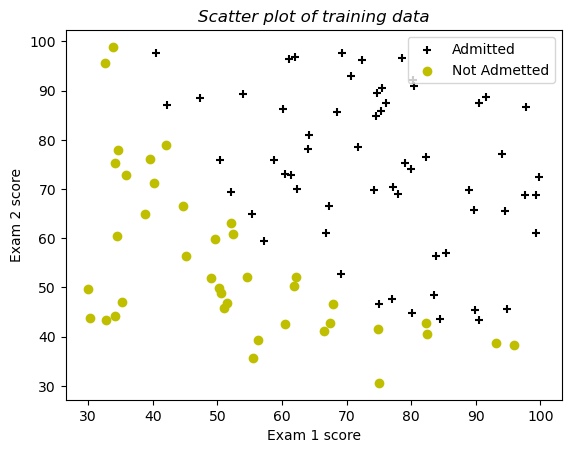

In [5]:
plt.scatter(Admitted.exam_1, Admitted.exam_2, marker='+', color='black', label='Admitted')
plt.scatter(Rejected.exam_1, Rejected.exam_2, marker='o', color='y', label='Not Admetted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Scatter plot of training data',style='oblique')
plt.legend(loc='upper right')
plt.show()

In [7]:
data = np.loadtxt('D:/M2/data mining/TP2 ex2data1.txt', delimiter=',')
X = data[:,:-1]
y = data[:, -1]

In [8]:
def sigmoid(x):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = 1/(np.exp(-x)+1)
        return result

In [9]:
sigmoid(0)

0.5

In [10]:
sigmoid(0.3)

0.574442516811659

In [11]:
sigmoid(10)

0.9999546021312976

In [12]:
sigmoid(-1)

0.2689414213699951

In [13]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [14]:
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
y.shape

(100,)

In [16]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.ravel().dot(np.log(h)) + (1-y.ravel()).dot(np.log(1-h)))
    return J

Cost at optimal parameters:  0.20349770158944375


C:\Users\youss\AppData\Local\Temp\ipykernel_7488\622338887.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.ravel().dot(np.log(h)) + (1-y.ravel()).dot(np.log(1-h)))
C:\Users\youss\AppData\Local\Temp\ipykernel_7488\622338887.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.ravel().dot(np.log(h)) + (1-y.ravel()).dot(np.log(1-h)))


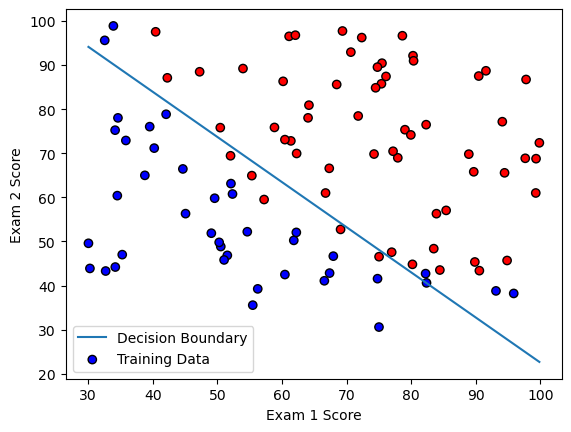

In [17]:
def gradient_function(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    h = sigmoid(X @ theta.T)
    grad = 1/m * X.T.dot(h-y)
    return grad.flatten()


# add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# initialize parameters
initial_theta = np.zeros(X.shape[1])

# minimize cost function using BFGS algorithm
result = minimize(cost_function, initial_theta, args=(X, y), method=None, jac=gradient_function, options={'maxiter':400})
theta_opt = result.x

# calculate and print cost at optimal parameters
J = cost_function(theta_opt, X, y)
print("Cost at optimal parameters: ", J)

# plot decision boundary
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (theta_opt[0] + np.dot(theta_opt[1], x_values)) / theta_opt[2]
plt.plot(x_values, y_values, label='Decision Boundary')

# plot data points
plt.scatter(X[:, 1], X[:, 2], c=y.ravel(), cmap='bwr', edgecolors='black', label='Training Data')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

In [18]:
# Define input features for new student
new_student = np.array([1, 45, 85])

# Predict probability of admission for new student
probability = sigmoid(np.dot(new_student, theta_opt))

print("Probability of admission for student with exam scores 45 and 85: {:.3f}".format(probability))

Probability of admission for student with exam scores 45 and 85: 0.776
